### Data visualization using Waffle Chart, Word Count and Regression Plot


#### Reading Data

In [8]:
#importing all modules
import numpy as np
import pandas as pd
from PIL import Image #converting images to array

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#reading the data set

#path of data file
path = 'Canada.xlsx'

#using read_excel function to read data file
df = pd.read_excel(
    path,
    sheet_name='Canada by Citizenship',
    skiprows= range(20),
    skipfooter=2
)

print("Data has been successfully read!!")

Data has been successfully read!!


In [3]:
#viewing the data set
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
#viewing the shape of data
df.shape

(195, 43)

#### Cleaning the data

In [5]:
#removing the unnecessary columns
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

#renmaing the columns
df.rename(columns={
    'OdName' : 'Country' ,
    'AreaName' : 'Continent' ,
    'RegName' : 'Region'
}, inplace=True)

#making all columns labels of type string
df.columns = list(map(str, df.columns))

#setting the index to 'Country' 
df.set_index('Country', inplace= True)

#adding a total column
df['Total'] = df.sum(axis=1)

df.head()

/tmp/ipykernel_30717/266360486.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
#creating a list of years to use it later to access data set
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

##### styling matplotlib

In [10]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [11]:
#changing style to dark background
mpl.style.use('dark_background')

#### Waffle Chart

Created to display progress toward goals.

``` Creating a waffle chart for Denmark, Norway and Sweden ```

In [14]:
#get the data set for Denamrk, Norway and Sweden
df_dns  = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dns.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Waffle chart are not built into any of the visualization libraries.

**Step1.** Determining the proportion of each category with respect to the total.


In [21]:
#compute the proportion of each category w.r.t total
total_values= df_dns['Total'].sum()

category_proportions= df_dns['Total'] / total_values

#printing proportion
pd.DataFrame({'Category Proportion': category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Step 2.** Defining the overall size of waffle chart

In [22]:
width = 40 #width of chart
height = 10 #height of chart

total_num_tiles = width * height #total number of tiles of chart

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


**Step 3.** Determine respective number of tiles.

In [24]:
#compute number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

#print out number of tiles per category
pd.DataFrame({'Number of tiles': tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


**Step 4.** Creating a matrix that resembles the waffle chart and populating it.

In [27]:
#initialize the waffle chart as an empty matrix
waffle_chart= np.zeros((height, width), dtype= np.uint)

#define indices to iterate through waffle chart
category_index= 0
tile_index= 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        
        waffle_chart[row, col] = category_index

print('Waffle chart populated!!')

Waffle chart populated!!


In [28]:
#display waffle chart
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

**Step 5.** Map the waffle chart matrix into a visual.

<Figure size 640x480 with 0 Axes>

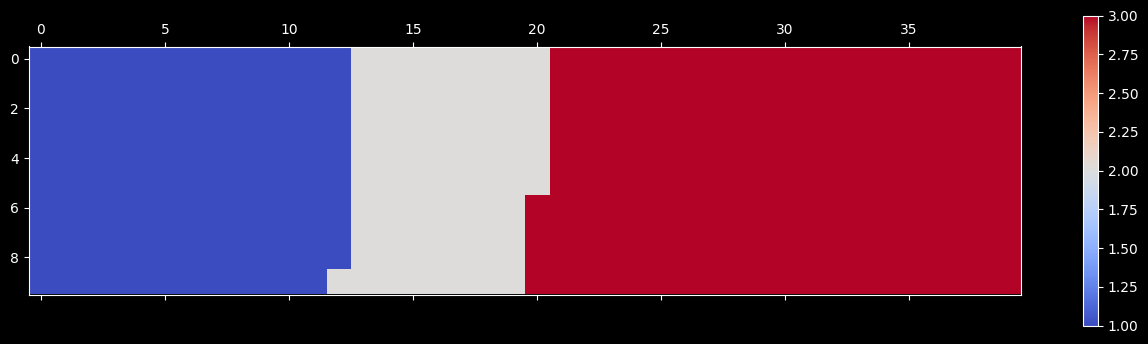

In [29]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle into a visual
colormap= plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.

<Figure size 640x480 with 0 Axes>

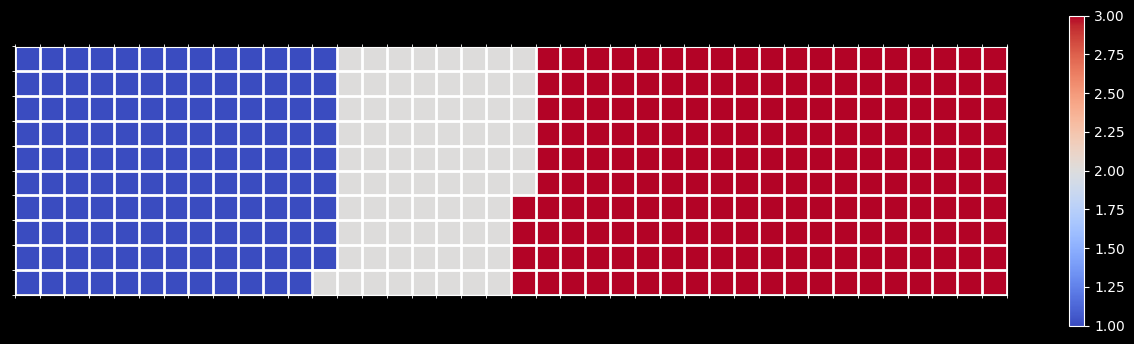

In [31]:
#instantiate a new figure object
from os import minor
from shutil import which


fig = plt.figure()

#use matshow to display the waffle into a visual
colormap= plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax= plt.gca()

#set the axis
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

plt.show()

Add legend

<Figure size 640x480 with 0 Axes>

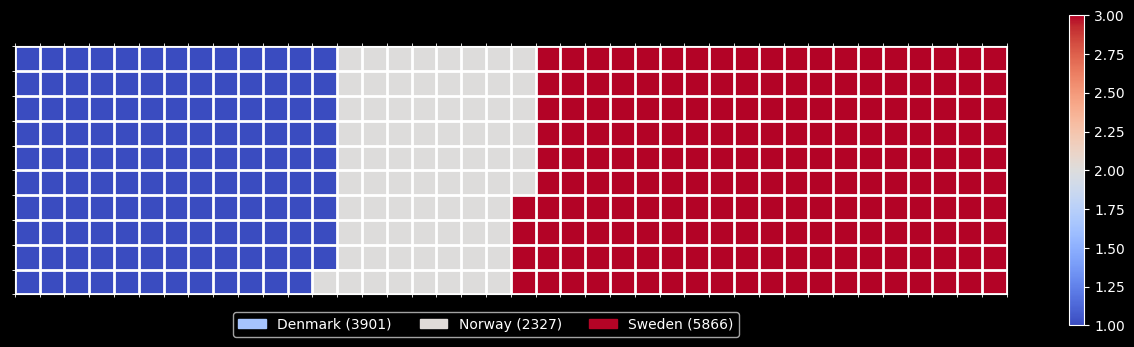

In [33]:
#instantiate a new figure object
fig = plt.figure()

#use matshow to display the waffle into a visual
colormap= plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#get the axis
ax= plt.gca()

#set the axis
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#compte cummlative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []

for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/ total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

#add legend to chart
plt.legend(
    handles = legend_handles,
    loc='lower center',
    ncol= len(df_dns.index.values),
    bbox_to_anchor= (0, -0.2, 0.95, -1)
    )

plt.show()

In [48]:
#function to create a waffle chart
def create_waffle_chart(df, categories, values, height, width, colormap, value_sign=' '):
    #compute the properties of each category w.r.t to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    #compute the total number of tiles
    total_num_tiles = width * height #total number of tiles
    print(f'Total number of tiles is {total_num_tiles}')

    #compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    #print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df.index.values[i] + ': ' + str(tiles))
    
    #initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    #define indices to loop through waffle chart
    category_index = 0
    title_index = 0

    #populate the waffle chart
    for col in range(width):
        for row in range(height):
            title_index += 1

            #if the number of tiles populated for the current category
            #is equal to its corresponding allocated tiles
            if title_index > sum(tiles_per_category[0: category_index]):
                #proceed to the next category
                category_index += 1

            #set the class value to an integer, which increase with class
            waffle_chart[row, col] = category_index
    
    #instantiate a new figure object
    fig = plt.figure()

    #use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    #get the axis
    ax = plt.gca()

    #set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    #add dridlines based on minor ticks
    ax.grid(
        which='minor',
        color='w',
        linestyle='-',
        linewidth=2
        )

    plt.xticks([])
    plt.yticks([])

    #compute cumulative sum of individual categories to match color schemes between chart and legend
    value_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    #create legend
    legend_handles = []

    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
    
        color_val = colormap(float(values_cumsum[i]/total_values))
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    #add lengend to chart
    plt.legend(
        handles= legend_handles,
        loc= 'lower center',
        ncol= len(categories),
        bbox_to_anchor= (0., -0.2, 0.95, .1)
    )

    plt.show()

In [49]:
#testing the function
width= 40
height= 10

categories= df_dns.index.values 
values = df_dns['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

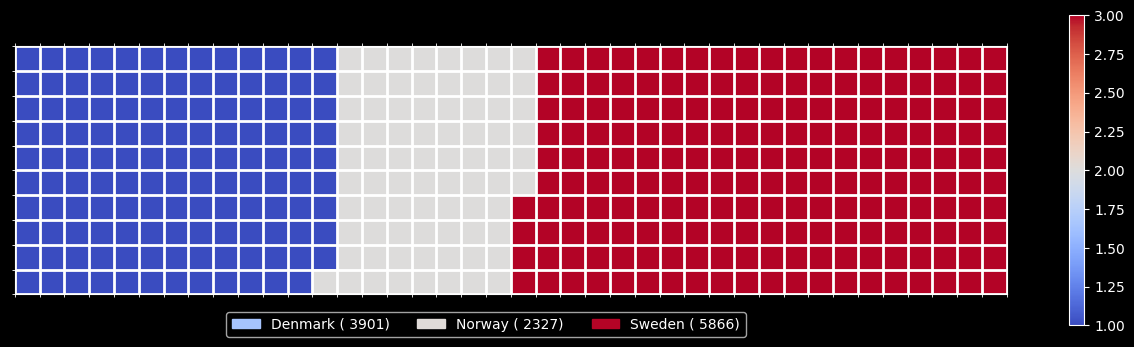

In [50]:
#calling function to create a waffle chart
create_waffle_chart(df_dns, categories, values, height, width, colormap)